In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from pprint import pprint
from collections import Counter
from data_util import load_dfs, filter_dfs
sys.path.append('../../mainstream/data')
import app_data
pd.set_option('precision', 4)
sns.set_style('ticks')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 7]
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['legend.fontsize'] = 15
matplotlib.rcParams['axes.titlesize'] = 'x-large'

In [2]:
prefix = "../../mainstream/log"
# prefix = "../output/streamer/scheduler/combinations"
df_all, baselines_fnr = load_dfs(prefix)

In [3]:
cols = [u'comb',
               u'No of applications',                    u'Avg FNR',
                 u'Avg Rel Acc Loss',                       u'FNRs',
                    u'Rel Acc Losss',                     u'Curves',
                      u'Normed FNRs',             u'Avg Normed FNR',
                        u'FNR Losss',               u'Avg FNR Loss',
                 u'Min Rel Acc Loss',           u'Max Rel Acc Loss',
             u'Max-Min Rel Acc Loss', u'(Max-Min)/Max Rel Acc Loss',
                          u'Min FNR',                    u'Max FNR',
                      u'Max-Min FNR',          u'(Max-Min)/Max FNR',
                   u'Min Normed FNR',             u'Max Normed FNR',
               u'Max-Min Normed FNR',   u'(Max-Min)/Max Normed FNR',
                     u'Min FNR Loss',               u'Max FNR Loss',
                 u'Max-Min FNR Loss',     u'(Max-Min)/Max FNR Loss']
df_all2 = df_all[cols]

def get_n_apps(x):
    return df_all2[df_all2['No of applications'] == x]

metrics = ['Rel Acc Loss', 'FNR', 'FNR Loss', 'Normed FNR']
bases = ['Rel Acc Loss', 'FNR']

In [4]:
curves = [a["accuracies"] for a in app_data.app_options3]
curve_titles = [a["name"] for a in app_data.app_options3]
# reorder = [0, 1, 5, 2, 3, 4]
reorder = [2, 3, 4]
# curve_titles = ['Fake-Linear', 'Fake-Log', 'Syn-Flowers_Inception', 'Syn-Cats_Inception', 'Syn-Paris_Inception', 'Fake-Inflection']

def plot_curves():
    for curve, title in zip(curves, curve_titles):
        xs, ys = zip(*sorted(curve.items()))
        if title.lower().startswith('fake') or title.lower().startswith('artificial'):
            style = 'o'
        elif title.lower().startswith('syn'):
            style = 'X'
        elif title.lower().startswith('real'):
            style = 's'
        else:
            print title
            raise
        plt.plot(xs, ys, style + '-', label=title)
    plt.xlabel('Layers fine-tuned')
    plt.ylabel('Accuracy')
    plt.legend();

## Curves

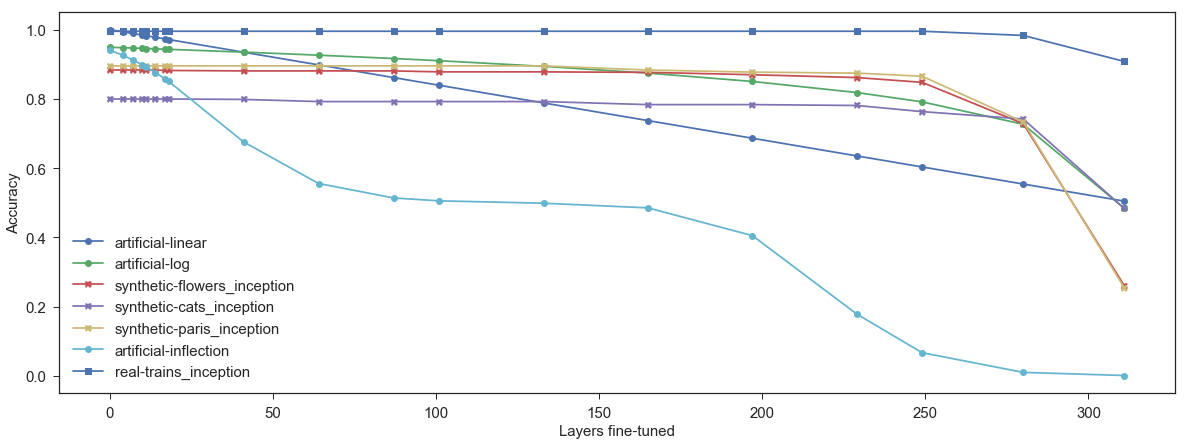

In [5]:
plot_curves()

### 1 application

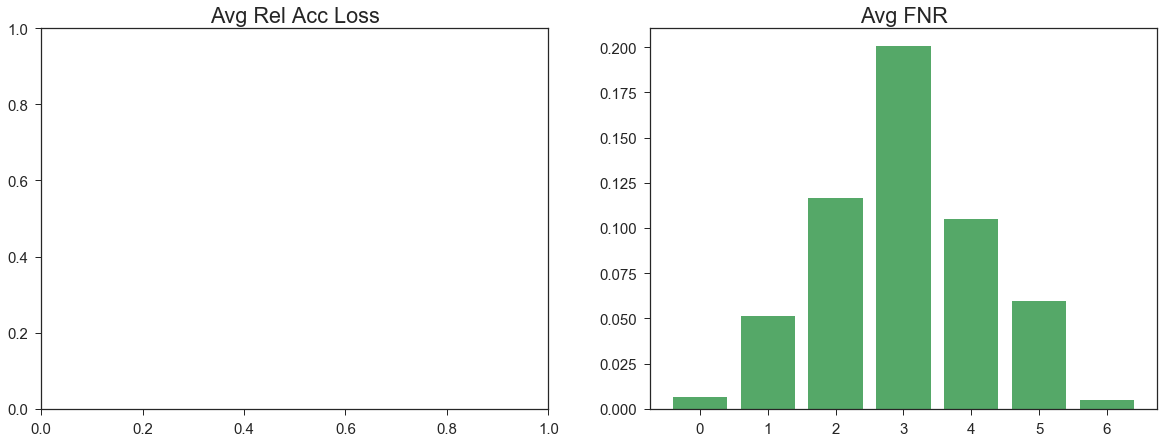

In [6]:
fig, axes = plt.subplots(1, 2)
for base, ax in zip(bases, axes):
    plt.bar(get_n_apps(1)['Avg '+base].index, get_n_apps(1)['Avg '+base].values)
    ax.set_title('Avg '+base)

In [7]:
get_n_apps(1)

,comb,No of applications,Avg FNR,Avg Rel Acc Loss,FNRs,Rel Acc Losss,Curves,Normed FNRs,Avg Normed FNR,FNR Losss,...,Max-Min FNR,(Max-Min)/Max FNR,Min Normed FNR,Max Normed FNR,Max-Min Normed FNR,(Max-Min)/Max Normed FNR,Min FNR Loss,Max FNR Loss,Max-Min FNR Loss,(Max-Min)/Max FNR Loss
0,[mean=0],1,0.0064,0.0064,[0.0064],[0.0064],[0],[1.0],1.0,[0.0],...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,[mean=1],1,0.0511,0.0000,[0.0511],[0.0],[1],[1.0],1.0,[0.0],...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[mean=2],1,0.1166,0.0000,[0.1166],[0.0],[2],[1.0],1.0,[0.0],...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,[mean=3],1,0.2004,0.0000,[0.2004],[0.0],[3],[1.0],1.0,[0.0],...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[mean=4],1,0.1048,0.0000,[0.1048],[0.0],[4],[1.0],1.0,[0.0],...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,[mean=5],1,0.0596,0.0000,[0.0596],[0.0],[5],[1.0],1.0,[0.0],...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,[mean=6],1,0.0048,0.0000,[0.0048],[0.0],[6],[1.0],1.0,[0.0],...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
matplotlib.rcParams['figure.figsize'] = [20, 5]

## 2 applications

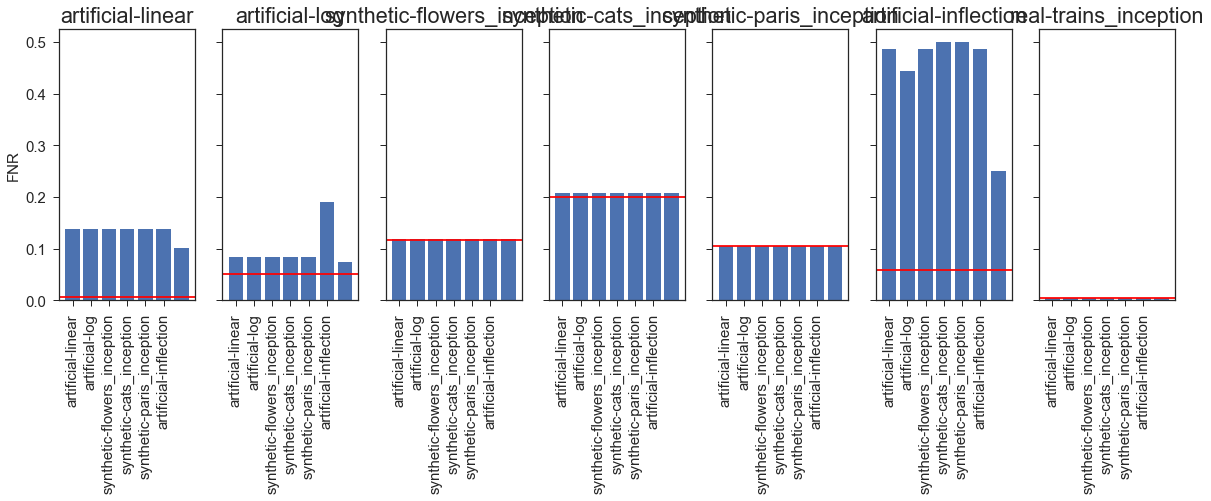

In [9]:
# for base, ax in zip(bases, axes):
#     plt.bar(get_n_apps(1)['Avg '+base].index, get_n_apps(1)['Avg '+base].values)
df_ = get_n_apps(2)[['Curves', 'FNRs', 'Rel Acc Losss']]

from collections import defaultdict
kk = defaultdict(dict)
def f(r):
    for curve, fnr in zip(r['Curves'], r['FNRs']):
        curve = int(curve)
        c_idx = map(int, r['Curves'])
        if curve != c_idx[0]:
            c_idx = reversed(c_idx)
        kk[curve][tuple(c_idx)] = fnr
df_.apply(f, axis=1)

fig, axes = plt.subplots(1, len(kk), sharey=True, sharex=True)
plt.xticks(range(6), curve_titles, rotation='vertical')

for ax, (k, v) in zip(axes, kk.items()):
    pts = sorted(v.items())
    xs, ys = zip(*pts)
    xs = [x[1] for x in xs]
    ax.bar(xs, ys)
    ax.set_title(curve_titles[k])
    ax.axhline(baselines_fnr[k], color='r')
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
axes[0].set_ylabel("FNR");

Red line = Baseline

## 3 apps

In [10]:
df_ = get_n_apps(3)[['Curves', 'FNRs', 'Rel Acc Losss']]

In [11]:
# condition on the value you want to see -- the FNR of 0

# two perspectives
# - comparing b/w models
# - comparing b/w all combinations Curve X is a part of -- because you want to benchmark it against its distribution

In [12]:
matplotlib.rcParams['figure.figsize'] = [20, 8]

def plot_dist(n_apps, dist=False, printonly=False):
    store = {k: {} for k, _ in enumerate(curve_titles)}
    def f(r):
        r['Curves'] = map(int, r['Curves'])
        for curve, metric in zip(r['Curves'], r['FNRs']):
            store[curve][tuple(r['Curves'])] = metric
    get_n_apps(n_apps).apply(f, axis=1)
    rows = 2
    fig, axes = plt.subplots(rows, len(curve_titles)/rows, sharex=dist)
    fig.subplots_adjust(hspace=.4)
    if rows > 1:
        axes = [item for sl in axes for item in sl]
    for i, ax in zip(reorder, axes):
        title = curve_titles[i]
        ctc = sorted(Counter(store[i].values()).items(), key=lambda x: x[1], reverse=True)
        if dist:
            sns.distplot(store[i].values(), ax=ax, kde=False, norm_hist=True, rug=True)
            ax.axvline(baselines_fnr[i], color='r')
            # TODO: Draw a line for baseline
        else:
            xs, ys = zip(*ctc)
            if printonly:
                pprint((i, ctc))
            else:
                xs = map('{:.2g}'.format, xs)
                ax.bar(range(len(xs)), ys)
                ax.set_xticklabels(xs)
                ax.set_xticks(range(len(xs)))
        ax.set_title(title)
    plt.suptitle("{} apps".format(n_apps))

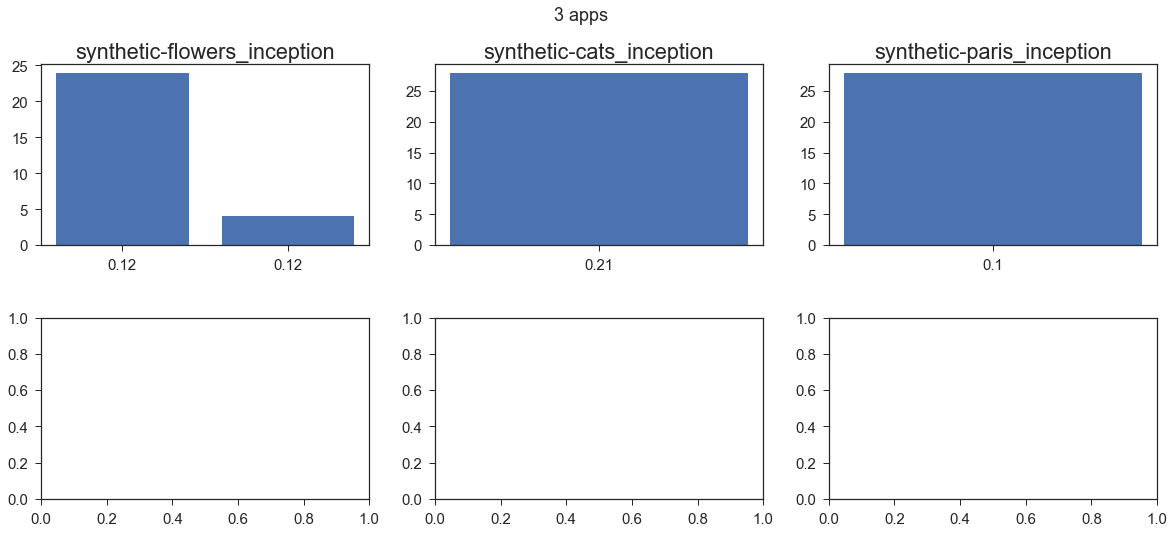

In [13]:
plot_dist(3)

## 4 apps

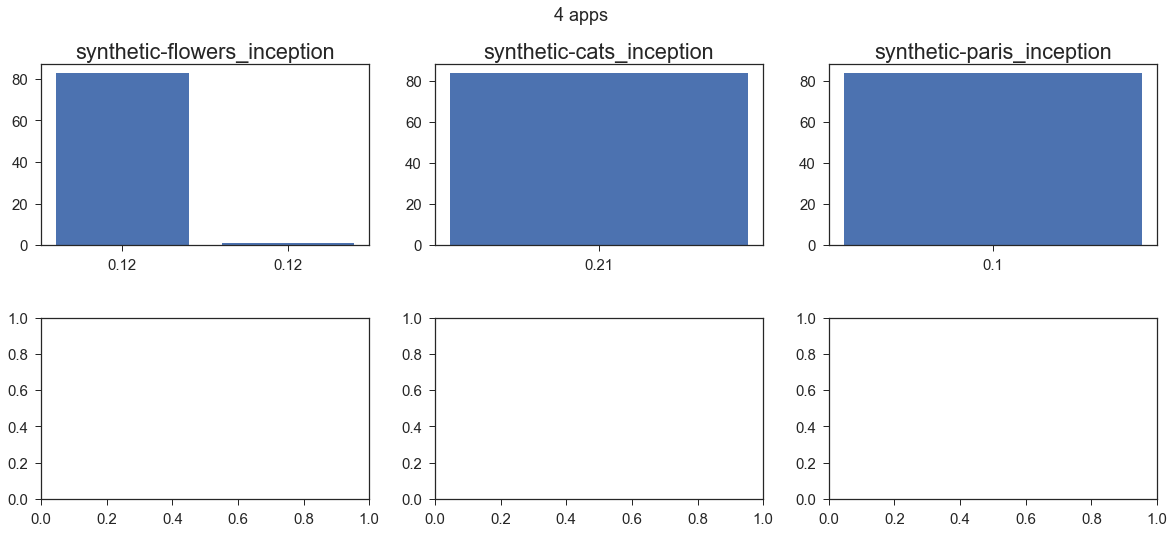

In [14]:
plot_dist(4)

## 5 apps

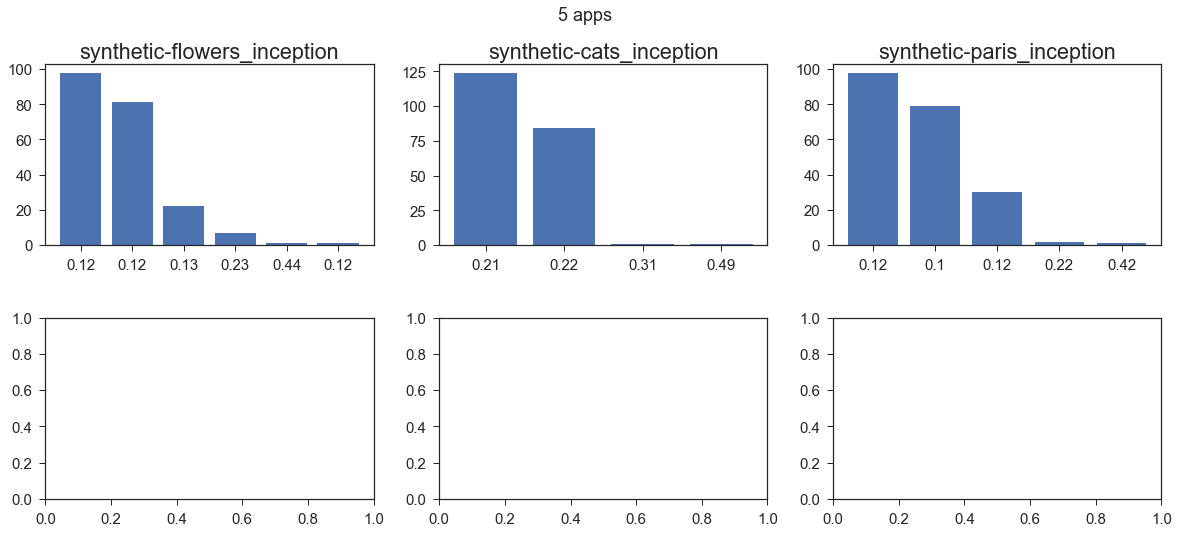

In [15]:
plot_dist(5)

## 6 apps

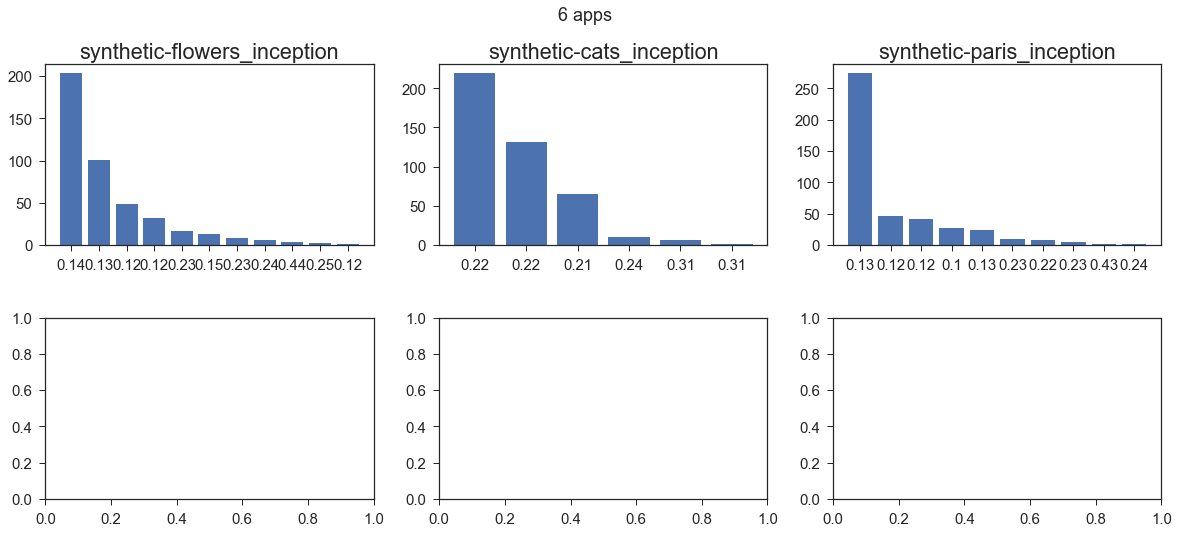

In [16]:
plot_dist(6)

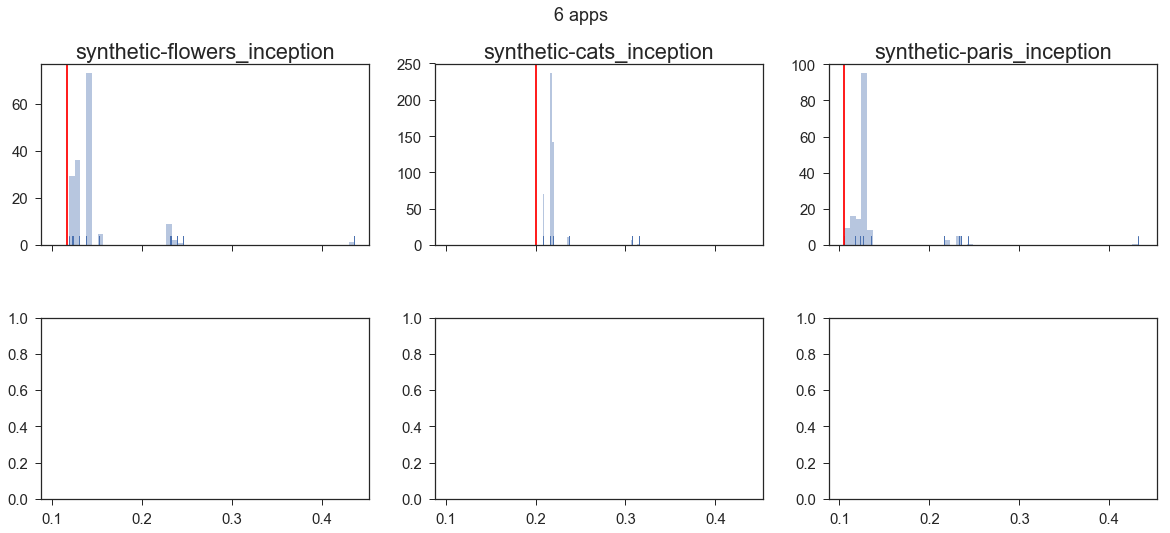

In [17]:
plot_dist(6, dist=True)

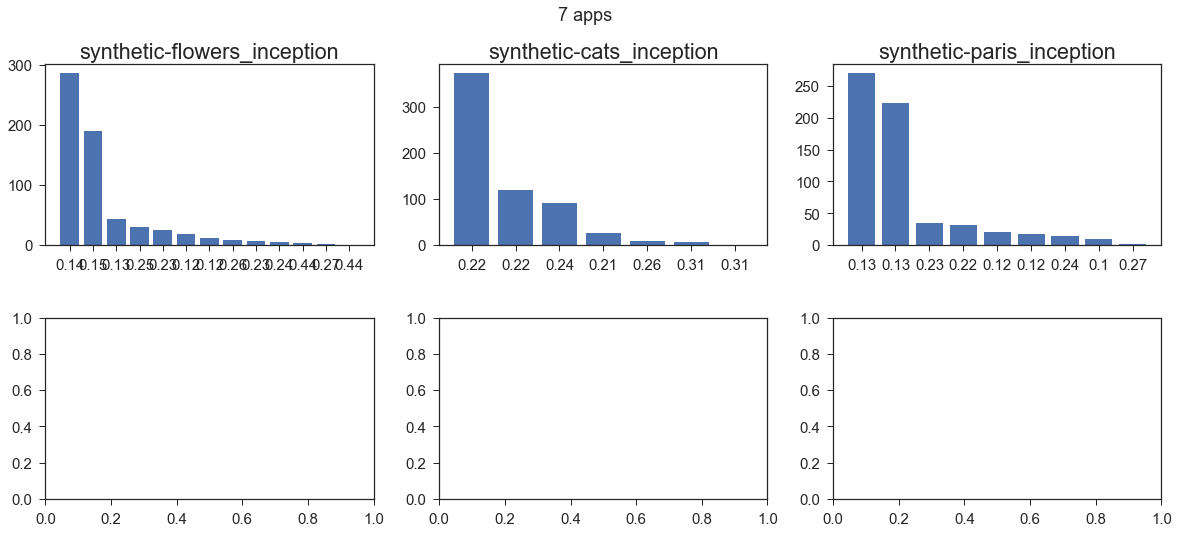

In [18]:
plot_dist(7)

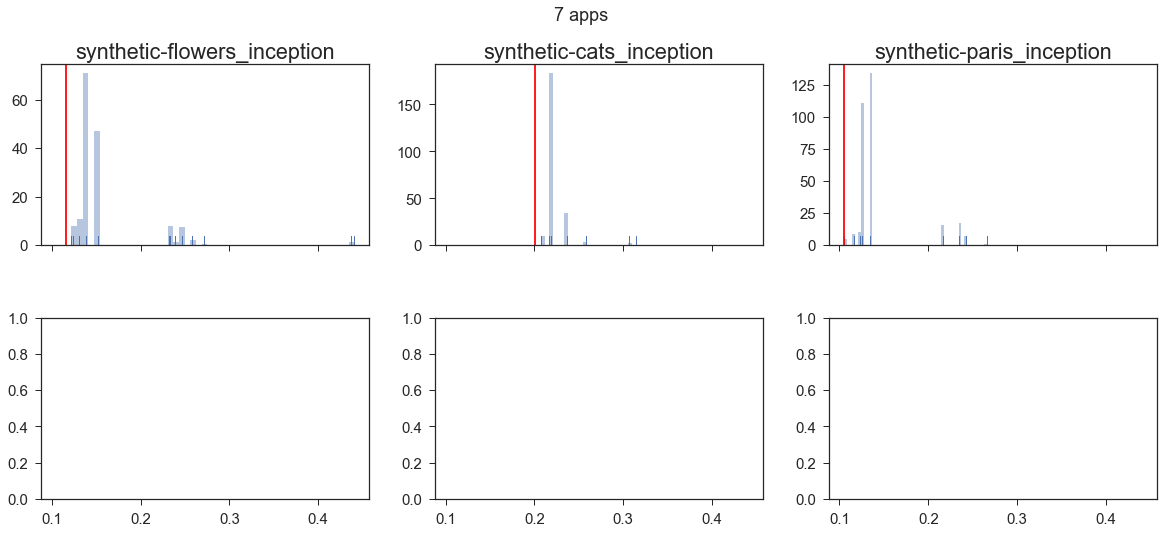

In [19]:
plot_dist(7, dist=True)

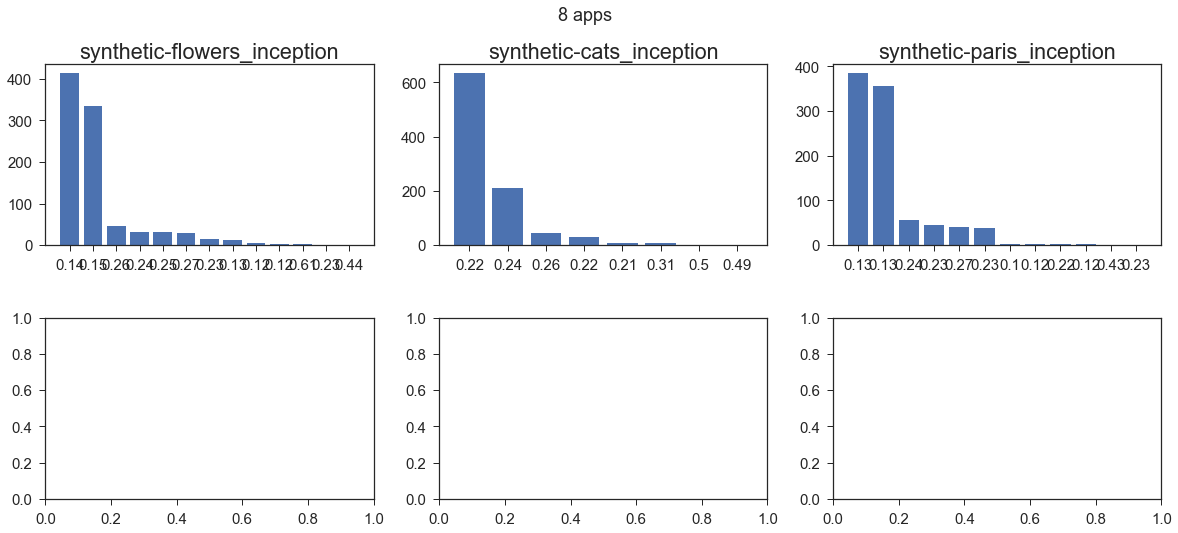

In [20]:
plot_dist(8)

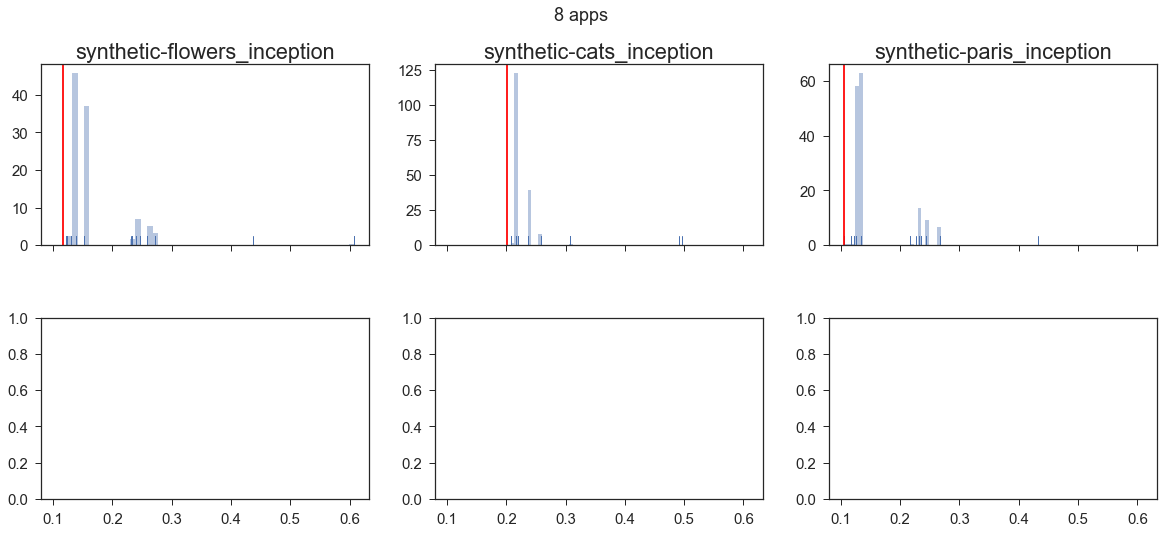

In [21]:
plot_dist(8, dist=True)

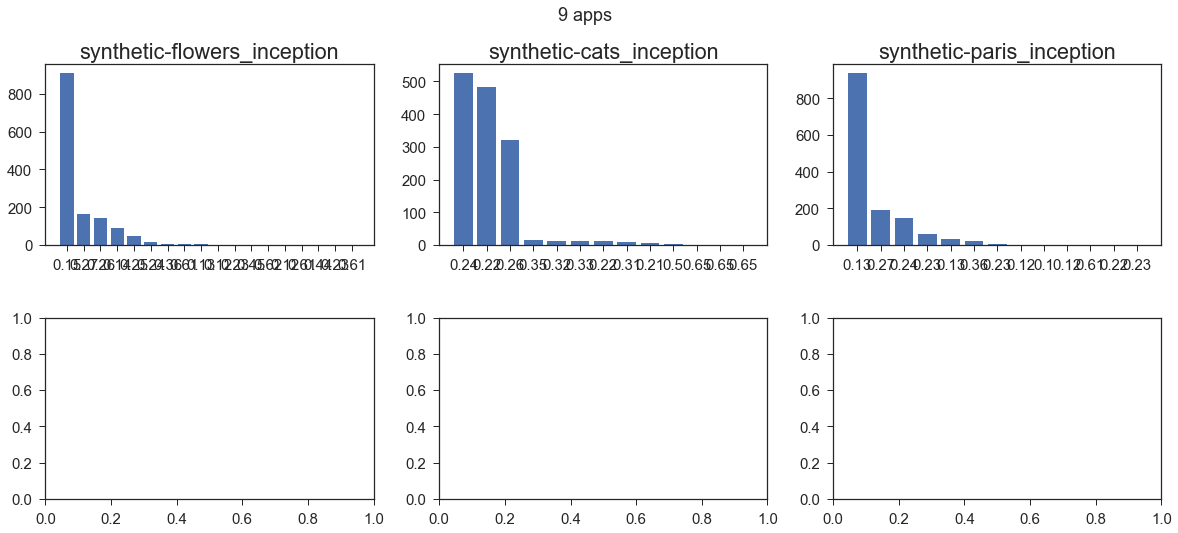

In [22]:
plot_dist(9)

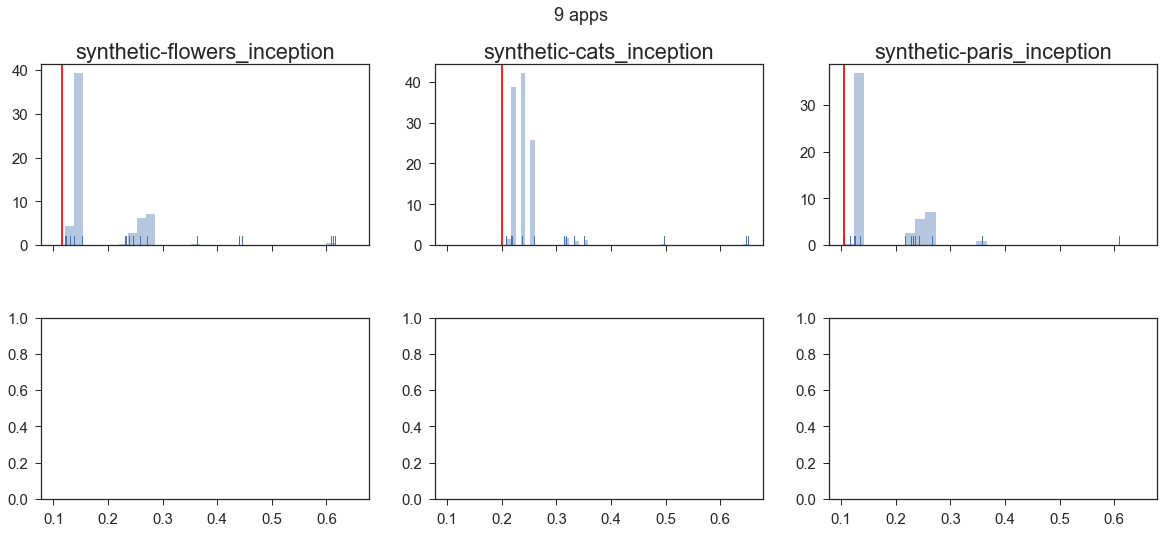

In [23]:
plot_dist(9, dist=True)

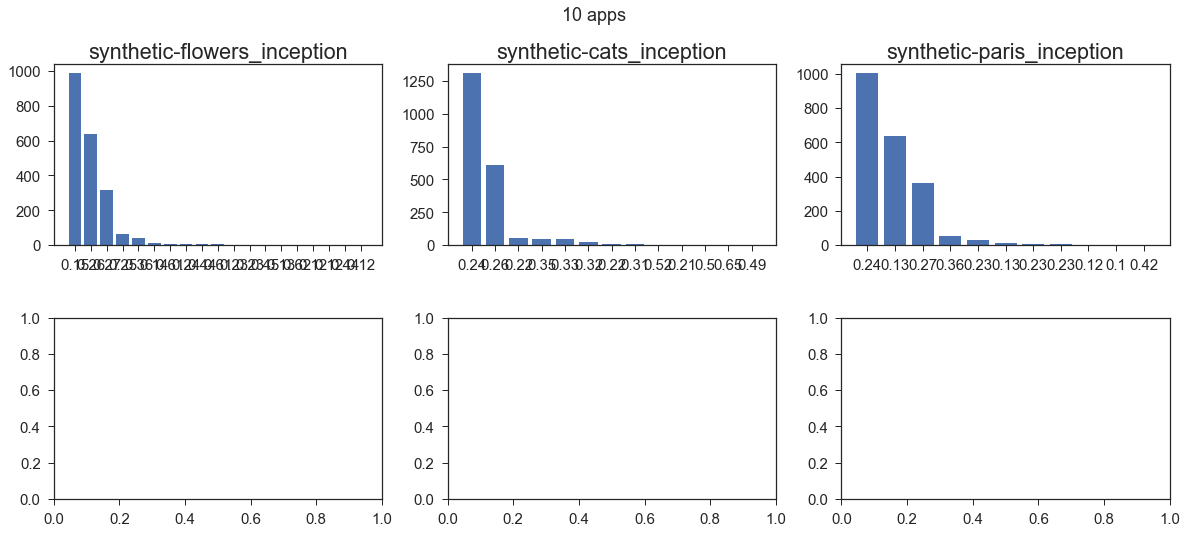

In [24]:
plot_dist(10)

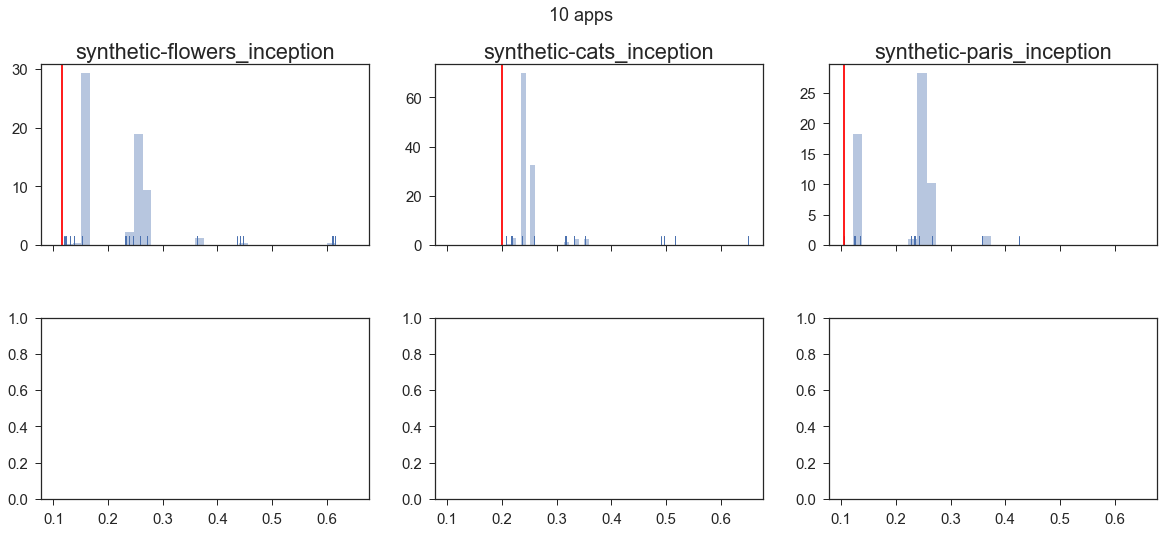

In [25]:
plot_dist(10, dist=True)

In [26]:
get_n_apps(3)[['Curves', 'FNRs', 'Rel Acc Losss']]

,Curves,FNRs,Rel Acc Losss
0,"[0, 0, 0]","[0.160828025478, 0.21178343949, 0.21178343949]","[0.160828025478, 0.21178343949, 0.21178343949]"
1,"[0, 0, 1]","[0.160828025478, 0.21178343949, 0.106172157841]","[0.160828025478, 0.21178343949, 0.0580552040462]"
2,"[0, 0, 2]","[0.160828025478, 0.21178343949, 0.1221]","[0.160828025478, 0.21178343949, 0.00622594521168]"
3,"[0, 0, 3]","[0.160828025478, 0.21178343949, 0.2078]","[0.160828025478, 0.21178343949, 0.00925462731366]"
4,"[0, 0, 4]","[0.160828025478, 0.21178343949, 0.1048]","[0.160828025478, 0.21178343949, 0.0]"
5,"[0, 1, 1]","[0.160828025478, 0.106172157841, 0.106172157841]","[0.160828025478, 0.0580552040462, 0.0580552040..."
6,"[0, 1, 2]","[0.160828025478, 0.106172157841, 0.1221]","[0.160828025478, 0.0580552040462, 0.0062259452..."
7,"[0, 1, 3]","[0.160828025478, 0.106172157841, 0.2078]","[0.160828025478, 0.0580552040462, 0.0092546273..."
8,"[0, 1, 4]","[0.160828025478, 0.106172157841, 0.1048]","[0.160828025478, 0.0580552040462, 0.0]"
9,"[0, 2, 2]","[0.160828025478, 0.1221, 0.1221]","[0.160828025478, 0.00622594521168, 0.006225945..."


### 4 apps

In [27]:
get_n_apps(4)[['Curves', 'FNRs', 'Rel Acc Losss']]

,Curves,FNRs,Rel Acc Losss
0,"[0, 0, 0, 0]","[0.21178343949, 0.21178343949, 0.21178343949, ...","[0.21178343949, 0.21178343949, 0.21178343949, ..."
1,"[0, 0, 0, 1]","[0.21178343949, 0.21178343949, 0.21178343949, ...","[0.21178343949, 0.21178343949, 0.21178343949, ..."
2,"[0, 0, 0, 2]","[0.21178343949, 0.21178343949, 0.21178343949, ...","[0.21178343949, 0.21178343949, 0.21178343949, ..."
3,"[0, 0, 0, 3]","[0.21178343949, 0.21178343949, 0.21178343949, ...","[0.21178343949, 0.21178343949, 0.21178343949, ..."
4,"[0, 0, 0, 4]","[0.21178343949, 0.21178343949, 0.21178343949, ...","[0.21178343949, 0.21178343949, 0.21178343949, ..."
5,"[0, 0, 1, 1]","[0.21178343949, 0.21178343949, 0.106172157841,...","[0.21178343949, 0.21178343949, 0.0580552040462..."
6,"[0, 0, 1, 2]","[0.21178343949, 0.21178343949, 0.106172157841,...","[0.21178343949, 0.21178343949, 0.0580552040462..."
7,"[0, 0, 1, 3]","[0.21178343949, 0.21178343949, 0.106172157841,...","[0.21178343949, 0.21178343949, 0.0580552040462..."
8,"[0, 0, 1, 4]","[0.21178343949, 0.21178343949, 0.106172157841,...","[0.21178343949, 0.21178343949, 0.0580552040462..."
9,"[0, 0, 2, 2]","[0.21178343949, 0.21178343949, 0.1221, 0.1221]","[0.21178343949, 0.21178343949, 0.0062259452116..."
